In [24]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [27]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)


In [28]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [29]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temp_df = pd.DataFrame(june_results, columns = ['date', 'June'])


In [30]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()
#df

,June
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [31]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [32]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [33]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_results, columns = ['date', 'December Temps'])

In [34]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


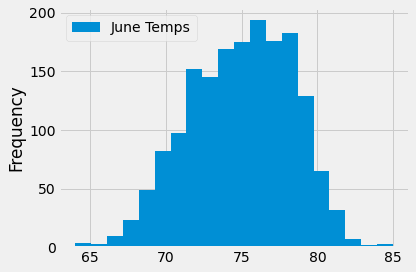

In [35]:
#Calculate and plot out the frequency for the June temperature DataFrame over various segments.
june_temps_df = pd.DataFrame(june_results, columns=['date','June Temps'])
june_temps_df.plot.hist(bins =20)
plt.tight_layout()

In [36]:
#Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


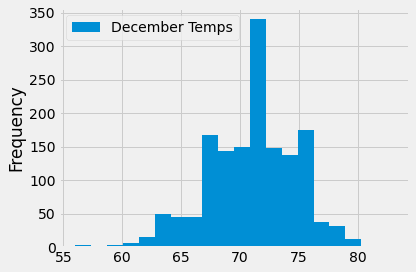

In [37]:
#Calculate and plot out the frequency for the December temperature DataFrame over various segments.
dec_temps_df = pd.DataFrame(dec_results, columns=['date','December Temps'])
dec_temps_df.plot.hist(bins =20)
plt.tight_layout()

In [38]:
#Calculate and print out the summary statistics for the December temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


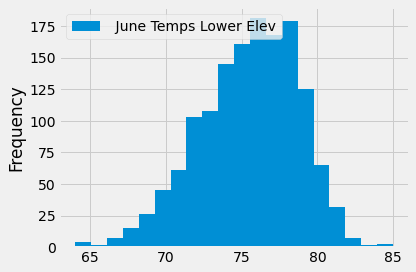

In [39]:
#Calculate and plot out the frequency for the June temperature DataFrame over various segments.
#Where Elevations above 40feet have been removed to only show temps of locations near the beach and at sea level
#This removes any impact on temp calculations caused by higher altitude stations
june_location_temps=session.query(Measurement.station, Measurement.tobs).filter(Measurement.station  == Station.station).\
    filter(extract('month', Measurement.date) ==6).\
    filter(Station.elevation <= 40).all()
june_location_temps = pd.DataFrame(june_location_temps, columns =['Station',' June Temps Lower Elev'])
june_location_temps.set_index('Station', inplace=True)
june_location_temps.plot.hist(bins = 20)
plt.tight_layout()
plt.show()

In [40]:
#Calculate and print out the summary statistics for the June temperature DataFrame. with higher altitude location excluded
june_location_temps.describe()

,June Temps Lower Elev
count,1439.000000
mean,75.451008
std,3.118911
min,64.000000
25%,73.000000
50%,76.000000
75%,78.000000
max,85.000000


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2016-06-11'),
  Text(0.0, 0, '2010-06-01'),
  Text(50.0, 0, '2011-06-21'),
  Text(100.0, 0, '2013-06-11'),
  Text(150.0, 0, '2015-06-01'),
  Text(200.0, 0, '2016-06-21'),
  Text(250.0, 0, ''),
  Text(300.0, 0, '')])

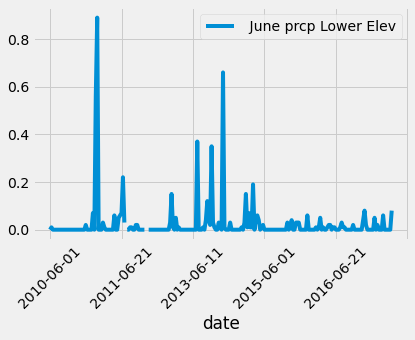

In [41]:
#Calculate and plot out the frequency for the June temperature DataFrame over various segments.
#Where Elevations above 40feet have been removed to only show prcp of locations near the beach and at sea level
#This removes any impact on prcp calculations caused by higher altitude stations
june_location_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.station  == Station.station).\
    filter(extract('month', Measurement.date) ==6).\
    filter(Station.elevation <= 40).group_by(Measurement.date).all()
june_location_prcp = pd.DataFrame(june_location_prcp, columns =['date',' June prcp Lower Elev'])
june_location_prcp.set_index('date', inplace=True)
june_location_prcp.plot()
plt.xticks(rotation = 45)

In [42]:
#Calculate and print out the summary statistics for the June prcp DataFrame. with higher altitude location excluded
june_location_prcp.describe()

,June prcp Lower Elev
count,237.000000
mean,0.023586
std,0.089633
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,0.890000


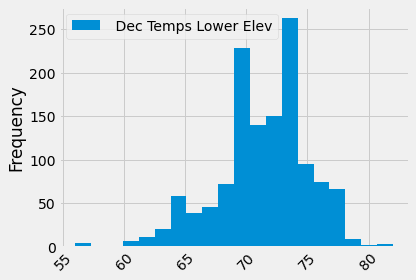

In [43]:
#Calculate and plot out the frequency for the Dec temperature DataFrame over various segments.
#Where Elevations above 40feet have been removed to only show temps of locations near the beach and at sea level
#This removes any impact on temp calculations caused by higher altitude stations
location_temps=session.query(Measurement.station, Measurement.tobs).filter(Measurement.station  == Station.station).\
    filter(extract('month', Measurement.date) ==12).\
    filter(Station.elevation <= 40).all()
dec_location_temps = pd.DataFrame(location_temps, columns =['Station',' Dec Temps Lower Elev'])
dec_location_temps.set_index('Station', inplace=False)
dec_location_temps.plot.hist(bins = 20)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [44]:
#Calculate and print out the summary statistics for the Dec temperature DataFrame. with higher altitude location excluded
dec_location_temps.describe()

,Dec Temps Lower Elev
count,1292.000000
mean,71.300310
std,3.775813
min,56.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,82.000000


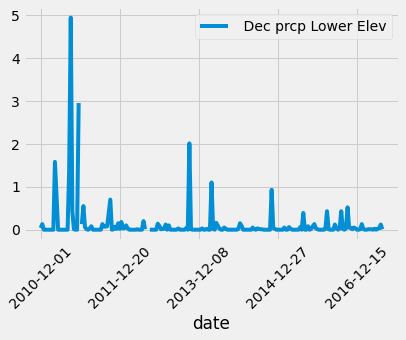

In [45]:
#Calculate and plot out the frequency for the December temperature DataFrame over various segments.
#Where Elevations above 40feet have been removed to only show prcp of locations near the beach and at sea level
#This removes any impact on prcp calculations caused by higher altitude stations

dec_location_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.station  == Station.station).\
    filter(extract('month', Measurement.date) ==12).\
    filter(Station.elevation <= 40).group_by(Measurement.date).all()
dec_location_prcp = pd.DataFrame(dec_location_prcp, columns =['date',' Dec prcp Lower Elev'])
dec_location_prcp.set_index('date', inplace=True)
dec_location_prcp.plot()#(x ='date',y = ['prcp'],kind="bar",figsize =(9,8))
plt.xticks(rotation = 45)
plt.show()

In [46]:
#Calculate and print out the summary statistics for the Dec prcp DataFrame. with higher altitude location excluded
dec_location_prcp.describe()

,Dec prcp Lower Elev
count,214.000000
mean,0.112383
std,0.454108
min,0.000000
25%,0.000000
50%,0.000000
75%,0.040000
max,4.940000
